In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import log_loss

In [2]:
crash_df = pd.read_csv('data/Crashes.csv')

In [3]:
crash_df

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,000ececd00a4474d1abebf13221e4a97efd79a0322f117...,JG360767,NaN,07/29/2023 11:40:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,...,0.0,0.0,2.0,0.0,11,7,7,41.895745,-87.706710,POINT (-87.706709567706 41.895744504664)
1,0124735faad5856d1b26286346c03c38541f61c42df468...,JG360636,NaN,07/29/2023 09:58:00 AM,45,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,...,0.0,0.0,2.0,0.0,9,7,7,41.660284,-87.588666,POINT (-87.58866623998 41.660283893596)
2,02e788cadf4b0a58ca09890c5a6650420b476b139c97ae...,JG360282,NaN,07/29/2023 01:10:00 AM,30,NO CONTROLS,NO CONTROLS,RAIN,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,...,0.0,0.0,1.0,0.0,1,7,7,41.691792,-87.669640,POINT (-87.669639640899 41.691791918312)
3,05de8a70d1ceb110907803131504c8f3a983dfaf1f2a96...,JG360988,Y,07/29/2023 02:45:00 PM,20,NO CONTROLS,NO CONTROLS,UNKNOWN,UNKNOWN,PARKED MOTOR VEHICLE,...,0.0,0.0,1.0,0.0,14,7,7,41.910379,-87.744822,POINT (-87.744821724517 41.910378596619)
4,069228f9f90160979974da95ed98427bfe5ae36b45bd01...,JG360972,NaN,07/29/2023 02:51:00 PM,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,0.0,0.0,2.0,0.0,14,7,7,41.750805,-87.640441,POINT (-87.640441368666 41.75080513114)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752955,fee492d287599472cc5572e66337f5f779b2cc6756764a...,JA139296,NaN,02/02/2017 03:15:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,REAR END,...,0.0,0.0,2.0,0.0,15,5,2,41.938944,-87.746247,POINT (-87.746247311774 41.938944239433)
752956,ff81d9efa3a82f9b137493a277f68238b4ffd4d3dfa782...,HY424359,NaN,09/15/2015 08:00:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,...,0.0,0.0,1.0,0.0,8,3,9,41.791413,-87.698471,POINT (-87.698470968672 41.791413476844)
752957,ffe0b2aa25b9cbdb4fb166f716a8592146a88d02824110...,JB565468,NaN,12/21/2018 04:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,...,0.0,0.0,2.0,0.0,16,6,12,41.880665,-87.627089,POINT (-87.627089364442 41.880664578396)
752958,fe9517cb7d7b337c8a76ec897ed7ba4c80851686dffe51...,JE254258,Y,06/04/2021 11:40:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,...,0.0,0.0,1.0,0.0,23,6,6,41.679331,-87.620405,POINT (-87.620404747226 41.679331366513)


In [4]:
crash_df.head()

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,000ececd00a4474d1abebf13221e4a97efd79a0322f117...,JG360767,NaN,07/29/2023 11:40:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,...,0.0,0.0,2.0,0.0,11,7,7,41.895745,-87.706710,POINT (-87.706709567706 41.895744504664)
1,0124735faad5856d1b26286346c03c38541f61c42df468...,JG360636,NaN,07/29/2023 09:58:00 AM,45,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,...,0.0,0.0,2.0,0.0,9,7,7,41.660284,-87.588666,POINT (-87.58866623998 41.660283893596)
2,02e788cadf4b0a58ca09890c5a6650420b476b139c97ae...,JG360282,NaN,07/29/2023 01:10:00 AM,30,NO CONTROLS,NO CONTROLS,RAIN,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,...,0.0,0.0,1.0,0.0,1,7,7,41.691792,-87.669640,POINT (-87.669639640899 41.691791918312)
3,05de8a70d1ceb110907803131504c8f3a983dfaf1f2a96...,JG360988,Y,07/29/2023 02:45:00 PM,20,NO CONTROLS,NO CONTROLS,UNKNOWN,UNKNOWN,PARKED MOTOR VEHICLE,...,0.0,0.0,1.0,0.0,14,7,7,41.910379,-87.744822,POINT (-87.744821724517 41.910378596619)
4,069228f9f90160979974da95ed98427bfe5ae36b45bd01...,JG360972,NaN,07/29/2023 02:51:00 PM,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,0.0,0.0,2.0,0.0,14,7,7,41.750805,-87.640441,POINT (-87.640441368666 41.75080513114)


In [5]:
crash_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752960 entries, 0 to 752959
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                752960 non-null  object 
 1   RD_NO                          748818 non-null  object 
 2   CRASH_DATE_EST_I               56786 non-null   object 
 3   CRASH_DATE                     752960 non-null  object 
 4   POSTED_SPEED_LIMIT             752960 non-null  int64  
 5   TRAFFIC_CONTROL_DEVICE         752960 non-null  object 
 6   DEVICE_CONDITION               752960 non-null  object 
 7   WEATHER_CONDITION              752960 non-null  object 
 8   LIGHTING_CONDITION             752960 non-null  object 
 9   FIRST_CRASH_TYPE               752960 non-null  object 
 10  TRAFFICWAY_TYPE                752960 non-null  object 
 11  LANE_CNT                       199004 non-null  float64
 12  ALIGNMENT                     

In [6]:
crash_df.describe()

,POSTED_SPEED_LIMIT,LANE_CNT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
count,752960.000000,1.990040e+05,752960.000000,752955.000000,752960.000000,751331.000000,751331.000000,751331.000000,751331.000000,751331.000000,751331.000000,751331.0,752960.000000,752960.000000,752960.000000,747985.000000,747985.000000
mean,28.385592,1.333043e+01,3684.738646,1241.658690,2.034589,0.187510,0.001181,0.020114,0.106015,0.060201,2.005651,0.0,13.212428,4.124483,6.603126,41.854753,-87.673503
std,6.214719,2.961638e+03,2890.964382,705.427573,0.452591,0.562135,0.037347,0.166250,0.419678,0.315100,1.159794,0.0,5.563593,1.980735,3.383430,0.332364,0.675037
min,0.000000,0.000000e+00,0.000000,111.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,-87.936193
25%,30.000000,2.000000e+00,1241.000000,713.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,9.000000,2.000000,4.000000,41.782156,-87.721611
50%,30.000000,2.000000e+00,3200.000000,1211.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,14.000000,4.000000,7.000000,41.874615,-87.673904
75%,30.000000,4.000000e+00,5600.000000,1822.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,17.000000,6.000000,10.000000,41.924216,-87.633147
max,99.000000,1.191625e+06,451100.000000,6100.000000,18.000000,21.000000,4.000000,10.000000,21.000000,15.000000,61.000000,0.0,23.000000,7.000000,12.000000,42.022780,0.000000


In [7]:
crash_df.isna().sum()

CRASH_RECORD_ID                       0
RD_NO                              4142
CRASH_DATE_EST_I                 696174
CRASH_DATE                            0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
LANE_CNT                         553956
ALIGNMENT                             0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
REPORT_TYPE                       21497
CRASH_TYPE                            0
INTERSECTION_RELATED_I           580437
NOT_RIGHT_OF_WAY_I               717912
HIT_AND_RUN_I                    518009
DAMAGE                                0
DATE_POLICE_NOTIFIED                  0
PRIM_CONTRIBUTORY_CAUSE               0
SEC_CONTRIBUTORY_CAUSE                0
STREET_NO                             0


In [8]:
crash_df['CRASH_DATE_EST_I'].value_counts()

Y    49509
N     7277
Name: CRASH_DATE_EST_I, dtype: int64

In [9]:
crash_df.drop(columns=['WORK_ZONE_I', 'WORK_ZONE_TYPE', 'DOORING_I', 'WORKERS_PRESENT_I',
                                          'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'RD_NO', 'REPORT_TYPE', 'NOT_RIGHT_OF_WAY_I', 'CRASH_DATE_EST_I'], axis=1, inplace=True)

In [10]:
crash_df.dropna(subset = ['INJURIES_TOTAL', 'LATITUDE', 'MOST_SEVERE_INJURY', 
                          'STREET_DIRECTION', 'BEAT_OF_OCCURRENCE'], axis=0, inplace=True)

In [11]:
#crash_df = crash_df[(crash_df['LANE_CNT'] <= 10)]

In [12]:
crash_df.shape

(746352, 39)

In [13]:
crash_df.head()

,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,000ececd00a4474d1abebf13221e4a97efd79a0322f117...,07/29/2023 11:40:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,NaN,...,0.0,0.0,2.0,0.0,11,7,7,41.895745,-87.706710,POINT (-87.706709567706 41.895744504664)
1,0124735faad5856d1b26286346c03c38541f61c42df468...,07/29/2023 09:58:00 AM,45,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,NOT DIVIDED,NaN,...,0.0,0.0,2.0,0.0,9,7,7,41.660284,-87.588666,POINT (-87.58866623998 41.660283893596)
2,02e788cadf4b0a58ca09890c5a6650420b476b139c97ae...,07/29/2023 01:10:00 AM,30,NO CONTROLS,NO CONTROLS,RAIN,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,NOT DIVIDED,NaN,...,0.0,0.0,1.0,0.0,1,7,7,41.691792,-87.669640,POINT (-87.669639640899 41.691791918312)
3,05de8a70d1ceb110907803131504c8f3a983dfaf1f2a96...,07/29/2023 02:45:00 PM,20,NO CONTROLS,NO CONTROLS,UNKNOWN,UNKNOWN,PARKED MOTOR VEHICLE,NOT DIVIDED,NaN,...,0.0,0.0,1.0,0.0,14,7,7,41.910379,-87.744822,POINT (-87.744821724517 41.910378596619)
4,069228f9f90160979974da95ed98427bfe5ae36b45bd01...,07/29/2023 02:51:00 PM,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,FOUR WAY,NaN,...,0.0,0.0,2.0,0.0,14,7,7,41.750805,-87.640441,POINT (-87.640441368666 41.75080513114)


### Notes on column identification:
- Crash_date_I is only used when crash_date was not reported on same day, must keep null values
- Most of our crashes seem to happen in 'ideal' conditions

In [14]:
crash_df.shape

(746352, 39)

In [15]:
crash_df.isna().sum()

CRASH_RECORD_ID                       0
CRASH_DATE                            0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
LANE_CNT                         548609
ALIGNMENT                             0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
CRASH_TYPE                            0
INTERSECTION_RELATED_I           574796
HIT_AND_RUN_I                    513102
DAMAGE                                0
DATE_POLICE_NOTIFIED                  0
PRIM_CONTRIBUTORY_CAUSE               0
SEC_CONTRIBUTORY_CAUSE                0
STREET_NO                             0
STREET_DIRECTION                      0
STREET_NAME                           0
BEAT_OF_OCCURRENCE                    0
NUM_UNITS                             0


In [66]:
crash_df['DAMAGE'].value_counts()

OVER $1,500      457715
$501 - $1,500    202205
$500 OR LESS      86432
Name: DAMAGE, dtype: int64

In [69]:
crash_df.shape

(746352, 41)

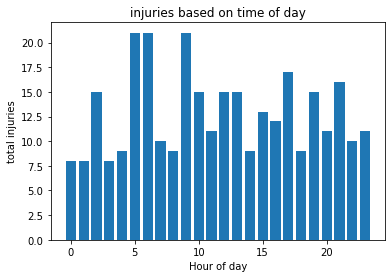

In [68]:
fig, ax = plt.subplots()
ax.bar(crash_df.CRASH_HOUR, crash_df.INJURIES_TOTAL)
ax.set_xlabel('Hour of day')
ax.set_ylabel('total injuries')
ax.set_title('injuries based on time of day');

In [64]:
linreg = LinearRegression()
feature_cols = ['CRASH_HOUR']
X = crash_df[feature_cols]
y = crash_df.INJURIES_TOTAL
linreg.fit(X, y)
crash_df['Injuries_pred'] = linreg.predict(X)

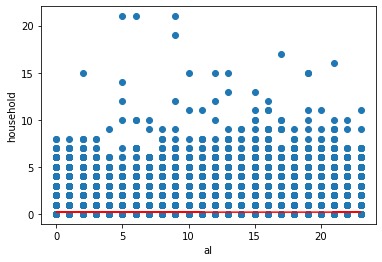

In [65]:
fig, ax = plt.subplots()
ax.scatter(crash_df.CRASH_HOUR, crash_df.INJURIES_TOTAL)
ax.plot(crash_df.CRASH_HOUR, crash_df.Injuries_pred, color='red')
ax.set_xlabel('al')
ax.set_ylabel('household');

In [18]:
vehicle_df = pd.read_csv('data/Vehicles.csv')

/Users/michaelromanski/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (19,21,40,41,42,44,48,49,50,53,55,58,59,61,71) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [19]:
vehicle_df

,CRASH_UNIT_ID,CRASH_RECORD_ID,RD_NO,CRASH_DATE,UNIT_NO,UNIT_TYPE,NUM_PASSENGERS,VEHICLE_ID,CMRC_VEH_I,MAKE,...,TRAILER1_LENGTH,TRAILER2_LENGTH,TOTAL_VEHICLE_LENGTH,AXLE_CNT,VEHICLE_CONFIG,CARGO_BODY_TYPE,LOAD_TYPE,HAZMAT_OUT_OF_SERVICE_I,MCS_OUT_OF_SERVICE_I,HAZMAT_CLASS
0,1554880,91a5d08b2b701f2d37cbb52ecdbeb09579bc7f2ebc60b3...,JG223284,04/14/2023 02:05:00 PM,1,DRIVER,NaN,1478881.0,NaN,FORD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,749947,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,1,DRIVER,NaN,834816.0,NaN,HONDA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,749949,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,2,PARKED,NaN,834819.0,NaN,TOYOTA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,749950,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,3,PARKED,NaN,834817.0,NaN,GENERAL MOTORS CORPORATION (GMC),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1554881,91a5d08b2b701f2d37cbb52ecdbeb09579bc7f2ebc60b3...,JG223284,04/14/2023 02:05:00 PM,2,DRIVER,1.0,1478892.0,NaN,ISUZU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535461,1571683,545044224202f24b78f10eef0aef2935ff9abfc4f10309...,JG253335,05/08/2023 11:25:00 PM,2,DRIVER,NaN,1495169.0,NaN,TOYOTA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1535462,1571684,6b53b6a8fb20fc4839856798fb480cd21db71c6a3fa9f9...,JG253334,05/08/2023 11:00:00 AM,1,DRIVER,NaN,1495166.0,NaN,UNKNOWN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1535463,1571685,6b53b6a8fb20fc4839856798fb480cd21db71c6a3fa9f9...,JG253334,05/08/2023 11:00:00 AM,2,DRIVER,NaN,1495168.0,NaN,TOYOTA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1535464,1571686,80405e9e967b0f5f8f3966f7917f389e63c4f5243a862b...,JG252873,05/08/2023 04:15:00 PM,1,DRIVER,NaN,1495170.0,NaN,TOYOTA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
vehicle_df.head()

,CRASH_UNIT_ID,CRASH_RECORD_ID,RD_NO,CRASH_DATE,UNIT_NO,UNIT_TYPE,NUM_PASSENGERS,VEHICLE_ID,CMRC_VEH_I,MAKE,...,TRAILER1_LENGTH,TRAILER2_LENGTH,TOTAL_VEHICLE_LENGTH,AXLE_CNT,VEHICLE_CONFIG,CARGO_BODY_TYPE,LOAD_TYPE,HAZMAT_OUT_OF_SERVICE_I,MCS_OUT_OF_SERVICE_I,HAZMAT_CLASS
0,1554880,91a5d08b2b701f2d37cbb52ecdbeb09579bc7f2ebc60b3...,JG223284,04/14/2023 02:05:00 PM,1,DRIVER,NaN,1478881.0,NaN,FORD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,749947,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,1,DRIVER,NaN,834816.0,NaN,HONDA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,749949,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,2,PARKED,NaN,834819.0,NaN,TOYOTA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,749950,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,3,PARKED,NaN,834817.0,NaN,GENERAL MOTORS CORPORATION (GMC),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1554881,91a5d08b2b701f2d37cbb52ecdbeb09579bc7f2ebc60b3...,JG223284,04/14/2023 02:05:00 PM,2,DRIVER,1.0,1478892.0,NaN,ISUZU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1535466 entries, 0 to 1535465
Data columns (total 72 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   CRASH_UNIT_ID             1535466 non-null  int64  
 1   CRASH_RECORD_ID           1535466 non-null  object 
 2   RD_NO                     1526970 non-null  object 
 3   CRASH_DATE                1535466 non-null  object 
 4   UNIT_NO                   1535466 non-null  int64  
 5   UNIT_TYPE                 1533417 non-null  object 
 6   NUM_PASSENGERS            227440 non-null   float64
 7   VEHICLE_ID                1500626 non-null  float64
 8   CMRC_VEH_I                28642 non-null    object 
 9   MAKE                      1500621 non-null  object 
 10  MODEL                     1500477 non-null  object 
 11  LIC_PLATE_STATE           1363643 non-null  object 
 12  VEHICLE_YEAR              1257878 non-null  float64
 13  VEHICLE_DEFECT            1

In [22]:
vehicle_df.describe()

,CRASH_UNIT_ID,UNIT_NO,NUM_PASSENGERS,VEHICLE_ID,VEHICLE_YEAR,OCCUPANT_CNT,CMV_ID,TRAILER1_LENGTH,TRAILER2_LENGTH,TOTAL_VEHICLE_LENGTH,AXLE_CNT
count,1.535466e+06,1.535466e+06,227440.000000,1.500626e+06,1.257878e+06,1.500626e+06,15862.000000,2265.000000,66.000000,2749.000000,4092.000000
mean,8.210942e+05,4.025056e+00,1.471606,7.810216e+05,2.013881e+03,1.078954e+00,8850.115748,48.403974,44.530303,53.211713,10.072092
std,4.758389e+05,3.048918e+03,1.061020,4.509098e+05,1.407801e+02,7.842505e-01,5123.978834,21.049993,28.290373,31.578861,406.541439
min,2.000000e+00,0.000000e+00,1.000000,2.000000e+00,1.900000e+03,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.078852e+05,1.000000e+00,1.000000,3.908632e+05,2.007000e+03,1.000000e+00,4383.250000,45.000000,24.250000,35.000000,2.000000
50%,8.218215e+05,2.000000e+00,1.000000,7.803675e+05,2.012000e+03,1.000000e+00,8875.500000,53.000000,49.000000,53.000000,3.000000
75%,1.233450e+06,2.000000e+00,2.000000,1.170752e+06,2.016000e+03,1.000000e+00,13313.500000,53.000000,53.000000,66.000000,5.000000
max,1.643141e+06,3.778035e+06,59.000000,1.563711e+06,9.999000e+03,9.900000e+01,17670.000000,740.000000,123.000000,999.000000,26009.000000


In [23]:
vehicle_df.isna().sum()

CRASH_UNIT_ID                    0
CRASH_RECORD_ID                  0
RD_NO                         8496
CRASH_DATE                       0
UNIT_NO                          0
                            ...   
CARGO_BODY_TYPE            1522916
LOAD_TYPE                  1523461
HAZMAT_OUT_OF_SERVICE_I    1524553
MCS_OUT_OF_SERVICE_I       1524305
HAZMAT_CLASS               1534417
Length: 72, dtype: int64

In [24]:
vehicle_df['CARGO_BODY_TYPE'].value_counts()

VAN/ENCLOSED BOX    5471
OTHER               2847
BUS                 1983
FLATBED              965
DUMP                 439
GARBAGE/REFUSE       369
TANK                 244
CONCRETE MIXER       116
AUTO TRANSPORTER     116
Name: CARGO_BODY_TYPE, dtype: int64

In [25]:
vehicle_df = vehicle_df[['CRASH_UNIT_ID', 'CRASH_RECORD_ID', 'CRASH_DATE', 'UNIT_NO', 'UNIT_TYPE',
                       'VEHICLE_YEAR', 'VEHICLE_USE', 'VEHICLE_TYPE', 'MANEUVER', 'OCCUPANT_CNT',
                         'AREA_00_I', 'AREA_01_I', 'AREA_02_I', 'AREA_03_I', 'AREA_04_I',
                       'AREA_05_I', 'AREA_06_I', 'AREA_07_I', 'AREA_08_I', 'AREA_09_I', 'AREA_10_I', 'AREA_11_I',
                       'AREA_12_I', 'AREA_99_I', 'FIRST_CONTACT_POINT']]

In [26]:
vehicle_df.head

<bound method NDFrame.head of          CRASH_UNIT_ID                                    CRASH_RECORD_ID  \
0              1554880  91a5d08b2b701f2d37cbb52ecdbeb09579bc7f2ebc60b3...   
1               749947  81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...   
2               749949  81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...   
3               749950  81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...   
4              1554881  91a5d08b2b701f2d37cbb52ecdbeb09579bc7f2ebc60b3...   
...                ...                                                ...   
1535461        1571683  545044224202f24b78f10eef0aef2935ff9abfc4f10309...   
1535462        1571684  6b53b6a8fb20fc4839856798fb480cd21db71c6a3fa9f9...   
1535463        1571685  6b53b6a8fb20fc4839856798fb480cd21db71c6a3fa9f9...   
1535464        1571686  80405e9e967b0f5f8f3966f7917f389e63c4f5243a862b...   
1535465        1571687  80405e9e967b0f5f8f3966f7917f389e63c4f5243a862b...   

                     CRASH_DATE  UNIT_NO UNIT

In [27]:
vehicle_df.isna().sum()

CRASH_UNIT_ID                0
CRASH_RECORD_ID              0
CRASH_DATE                   0
UNIT_NO                      0
UNIT_TYPE                 2049
VEHICLE_YEAR            277588
VEHICLE_USE              34840
VEHICLE_TYPE             34840
MANEUVER                 34840
OCCUPANT_CNT             34840
AREA_00_I              1481987
AREA_01_I              1127382
AREA_02_I              1290403
AREA_03_I              1389019
AREA_04_I              1388464
AREA_05_I              1307322
AREA_06_I              1296311
AREA_07_I              1316466
AREA_08_I              1312005
AREA_09_I              1437432
AREA_10_I              1393392
AREA_11_I              1258966
AREA_12_I              1264106
AREA_99_I              1363689
FIRST_CONTACT_POINT      37935
dtype: int64

In [28]:
vehicle_df.dropna(subset = ['VEHICLE_USE', 'FIRST_CONTACT_POINT', 'UNIT_TYPE'], axis=0, inplace=True)

<ipython-input-28-574b416c9431>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicle_df.dropna(subset = ['VEHICLE_USE', 'FIRST_CONTACT_POINT', 'UNIT_TYPE'], axis=0, inplace=True)


In [29]:
vehicle_df.isna().sum()

CRASH_UNIT_ID                0
CRASH_RECORD_ID              0
CRASH_DATE                   0
UNIT_NO                      0
UNIT_TYPE                    0
VEHICLE_YEAR            242344
VEHICLE_USE                  0
VEHICLE_TYPE                 0
MANEUVER                     0
OCCUPANT_CNT                 0
AREA_00_I              1444227
AREA_01_I              1090037
AREA_02_I              1252869
AREA_03_I              1351375
AREA_04_I              1350796
AREA_05_I              1269755
AREA_06_I              1258754
AREA_07_I              1278911
AREA_08_I              1274314
AREA_09_I              1399791
AREA_10_I              1355908
AREA_11_I              1221669
AREA_12_I              1226743
AREA_99_I              1325841
FIRST_CONTACT_POINT          0
dtype: int64

In [46]:
vehicle_df['VEHICLE_YEAR'].fillna(value = 'Unknown', inplace=True)

/Users/michaelromanski/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [47]:
vehicle_df['VEHICLE_YEAR'].value_counts()

Unknown    242344
2015.0      94291
2016.0      88695
2017.0      87310
2014.0      83244
            ...  
5012.0          1
5011.0          1
5005.0          1
5004.0          1
2091.0          1
Name: VEHICLE_YEAR, Length: 222, dtype: int64

In [31]:
people_df = pd.read_csv('data/People.csv')

/Users/michaelromanski/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (20,24,25,26,29) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [32]:
people_df

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,RD_NO,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,O749947,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,O871921,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,JD208731,827212.0,04/13/2020 10:50:00 PM,NaN,CHICAGO,IL,60620,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,O10018,DRIVER,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,HY484534,9579.0,11/01/2015 05:00:00 AM,NaN,NaN,NaN,NaN,...,NaN,IMPROPER BACKING,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
3,O10038,DRIVER,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,HY484750,9598.0,11/01/2015 08:00:00 AM,NaN,NaN,NaN,NaN,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,O10039,DRIVER,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,HY484778,9600.0,11/01/2015 10:15:00 AM,NaN,NaN,NaN,NaN,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1652389,P362303,PASSENGER,b8eec1e4857c0720739b328b6fd2672cd505da1fb9bdd5...,JG371010,1558161.0,08/05/2023 09:30:00 PM,3.0,NaN,IL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1652390,P362703,PASSENGER,9bccb25f06da5cbf0120080d1625733632dcec43ceedb3...,JG382935,1559688.0,08/05/2023 05:44:00 PM,3.0,STREETER,IL,61364,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1652391,P362707,PASSENGER,f4a6e2653eb6d74f6168ef0f4e7600ad4f01722f57440b...,JG371068,1559080.0,08/05/2023 09:50:00 PM,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1652392,P362844,PASSENGER,0a27777a9dc807b3750771cda84490f2806ed5a5b4a55a...,JG384200,1560318.0,08/05/2023 07:30:00 PM,1.0,CHICAGO,IL,60647,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
people_df.head()

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,RD_NO,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,O749947,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,O871921,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,JD208731,827212.0,04/13/2020 10:50:00 PM,NaN,CHICAGO,IL,60620,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,O10018,DRIVER,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,HY484534,9579.0,11/01/2015 05:00:00 AM,NaN,NaN,NaN,NaN,...,NaN,IMPROPER BACKING,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
3,O10038,DRIVER,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,HY484750,9598.0,11/01/2015 08:00:00 AM,NaN,NaN,NaN,NaN,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,O10039,DRIVER,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,HY484778,9600.0,11/01/2015 10:15:00 AM,NaN,NaN,NaN,NaN,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN


In [34]:
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652394 entries, 0 to 1652393
Data columns (total 30 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   PERSON_ID              1652394 non-null  object 
 1   PERSON_TYPE            1652394 non-null  object 
 2   CRASH_RECORD_ID        1652394 non-null  object 
 3   RD_NO                  1643132 non-null  object 
 4   VEHICLE_ID             1619747 non-null  float64
 5   CRASH_DATE             1652394 non-null  object 
 6   SEAT_NO                334702 non-null   float64
 7   CITY                   1204258 non-null  object 
 8   STATE                  1221419 non-null  object 
 9   ZIPCODE                1102826 non-null  object 
 10  SEX                    1625709 non-null  object 
 11  AGE                    1170451 non-null  float64
 12  DRIVERS_LICENSE_STATE  969446 non-null   object 
 13  DRIVERS_LICENSE_CLASS  815144 non-null   object 
 14  SAFETY_EQUIPMENT  

In [35]:
people_df['PERSON_TYPE'].value_counts()

DRIVER                 1285531
PASSENGER               334702
PEDESTRIAN               18989
BICYCLE                  11529
NON-MOTOR VEHICLE         1354
NON-CONTACT VEHICLE        289
Name: PERSON_TYPE, dtype: int64

In [36]:
people_df['BAC_RESULT'].value_counts()

TEST NOT OFFERED                   1296176
TEST REFUSED                         13905
TEST PERFORMED, RESULTS UNKNOWN       3258
TEST TAKEN                            2385
Name: BAC_RESULT, dtype: int64

In [37]:
people_df.describe()

,VEHICLE_ID,SEAT_NO,AGE,BAC_RESULT VALUE
count,1.619747e+06,334702.000000,1.170451e+06,1907.000000
mean,7.764038e+05,4.162398,3.785917e+01,0.170378
std,4.510162e+05,2.206652,1.709956e+01,0.102413
min,2.000000e+00,1.000000,-1.770000e+02,0.000000
25%,3.866235e+05,3.000000,2.500000e+01,0.120000
50%,7.679000e+05,3.000000,3.500000e+01,0.170000
75%,1.167092e+06,5.000000,5.000000e+01,0.220000
max,1.563711e+06,12.000000,1.100000e+02,1.000000


In [38]:
people_df.shape

(1652394, 30)

In [39]:
people_df.isna().sum()

PERSON_ID                      0
PERSON_TYPE                    0
CRASH_RECORD_ID                0
RD_NO                       9262
VEHICLE_ID                 32647
CRASH_DATE                     0
SEAT_NO                  1317692
CITY                      448136
STATE                     430975
ZIPCODE                   549568
SEX                        26685
AGE                       481943
DRIVERS_LICENSE_STATE     682948
DRIVERS_LICENSE_CLASS     837250
SAFETY_EQUIPMENT            4618
AIRBAG_DEPLOYED            31389
EJECTION                   20185
INJURY_CLASSIFICATION        691
HOSPITAL                 1372902
EMS_AGENCY               1479013
EMS_RUN_NO               1623741
DRIVER_ACTION             337662
DRIVER_VISION             338149
PHYSICAL_CONDITION        336759
PEDPEDAL_ACTION          1621383
PEDPEDAL_VISIBILITY      1621442
PEDPEDAL_LOCATION        1621385
BAC_RESULT                336670
BAC_RESULT VALUE         1650487
CELL_PHONE_USE           1651236
dtype: int

In [40]:
people_df.drop(columns=['RD_NO', 'CELL_PHONE_USE', 'PEDPEDAL_ACTION', 
                        'PEDPEDAL_VISIBILITY', 'PEDPEDAL_LOCATION', 'SEAT_NO', 
                        'HOSPITAL', 'EMS_AGENCY', 'EMS_RUN_NO', 'BAC_RESULT', 'BAC_RESULT VALUE', 
                        'DRIVERS_LICENSE_STATE', 'DRIVERS_LICENSE_CLASS', 'CITY', 'STATE', 'ZIPCODE']
               , axis=1, inplace=True)

In [41]:
people_df['DRIVER_ACTION'].value_counts()

NONE                                 472311
UNKNOWN                              328037
FAILED TO YIELD                      119598
OTHER                                116908
FOLLOWED TOO CLOSELY                  79199
IMPROPER BACKING                      39690
IMPROPER TURN                         34443
IMPROPER LANE CHANGE                  33863
IMPROPER PASSING                      29248
DISREGARDED CONTROL DEVICES           23008
TOO FAST FOR CONDITIONS               20061
WRONG WAY/SIDE                         5212
IMPROPER PARKING                       4891
OVERCORRECTED                          2254
EVADING POLICE VEHICLE                 2080
CELL PHONE USE OTHER THAN TEXTING      1989
EMERGENCY VEHICLE ON CALL              1200
TEXTING                                 531
STOPPED SCHOOL BUS                      155
LICENSE RESTRICTIONS                     54
Name: DRIVER_ACTION, dtype: int64

In [42]:
people_df.isna().sum()

PERSON_ID                     0
PERSON_TYPE                   0
CRASH_RECORD_ID               0
VEHICLE_ID                32647
CRASH_DATE                    0
SEX                       26685
AGE                      481943
SAFETY_EQUIPMENT           4618
AIRBAG_DEPLOYED           31389
EJECTION                  20185
INJURY_CLASSIFICATION       691
DRIVER_ACTION            337662
DRIVER_VISION            338149
PHYSICAL_CONDITION       336759
dtype: int64

In [43]:
people_df.dropna(subset = ['AIRBAG_DEPLOYED', 'EJECTION', 'INJURY_CLASSIFICATION', 'VEHICLE_ID', 
                           'SAFETY_EQUIPMENT', 'SEX'], axis=0, inplace=True)

In [44]:
people_df.isna().sum()

PERSON_ID                     0
PERSON_TYPE                   0
CRASH_RECORD_ID               0
VEHICLE_ID                    0
CRASH_DATE                    0
SEX                           0
AGE                      454746
SAFETY_EQUIPMENT              0
AIRBAG_DEPLOYED               0
EJECTION                      0
INJURY_CLASSIFICATION         0
DRIVER_ACTION            309054
DRIVER_VISION            309054
PHYSICAL_CONDITION       309056
dtype: int64

In [45]:
people_df.shape

(1593967, 14)